#### Problem 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

np.random.seed(42)

In [7]:
# 1
manual = [
    1, 3, 5, 7, 9, 2, 4, 6, 8, 10,
    11, 13, 15, 17, 19, 12, 14, 16, 18, 20,
    1, 4, 7, 10, 3, 6, 9, 2, 5, 8,
    11, 14, 17, 20, 13, 16, 19, 12, 15, 18,
    1, 5, 9, 13, 17, 2, 6, 10, 14, 18,
    3, 7, 11, 15, 19, 4, 8, 12, 16, 20,
    1, 6, 11, 16, 2, 7, 12, 17, 3, 8,
    13, 18, 4, 9, 14, 19, 5, 10, 15, 20,
    1, 7, 13, 19, 2, 8, 14, 20, 3, 9,
    15, 4, 10, 16, 5, 11, 17, 6, 12, 18
]

# 2
uniform = np.random.randint(1, 21, 100)
uniform

array([17,  2,  1, 16, 12,  5,  5,  9,  9,  3, 19, 16, 16,  3, 20,  1, 20,
       11, 17,  8,  4,  6,  8, 20,  3, 16,  3, 18, 14, 18,  2,  3, 16,  9,
        4,  1,  4,  1, 14, 16, 20,  8,  7,  3, 17,  1, 16, 12, 19, 14,  6,
        6, 13, 19,  8,  2,  1, 15,  1,  5, 16, 19,  4,  3, 17, 17, 12, 14,
        6,  3,  9,  5, 17, 14,  3,  1, 20,  1,  3, 18, 10,  3,  8, 14, 18,
       15,  2, 10,  2, 17,  8,  1,  9, 11, 16,  7, 10,  3, 18, 13])

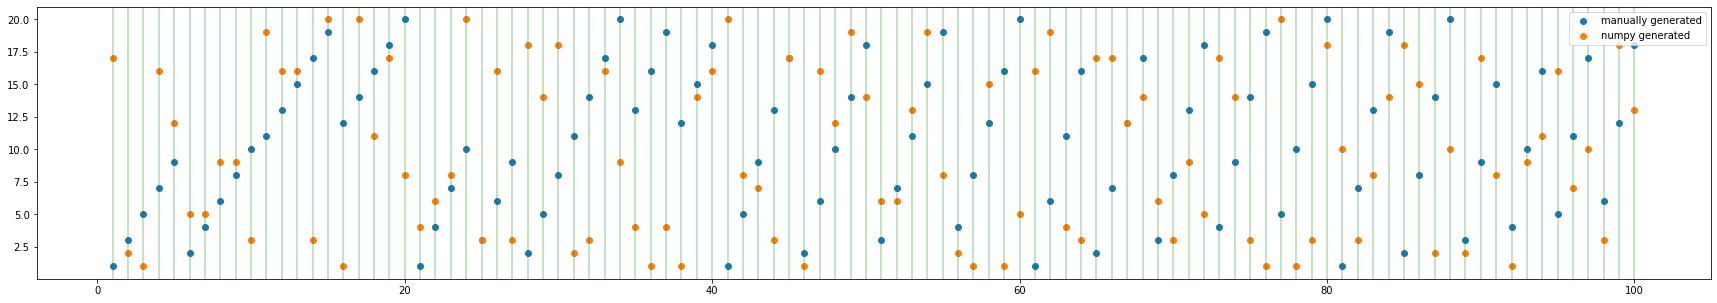

In [28]:
# 3
plt.figure(figsize=(30,5))
xcoords = np.arange(1, 101)
plt.scatter(xcoords, manual, label='manually generated')
plt.scatter(xcoords, uniform, label='numpy generated')
for xc in xcoords:
    plt.axvline(x=xc, alpha=0.3, c='green')
plt.legend()
plt.show()

In [29]:
# 4
print(f"Manual: mean {np.mean(manual)}, std {np.std(manual)}, skewness {stats.skew(manual)}, kurtosis {stats.kurtosis(manual)}")
print(f"Numpy: mean {np.mean(uniform)}, std {np.std(uniform)}, skewness {stats.skew(uniform)}, kurtosis {stats.kurtosis(uniform)}")
print(f"Analytical: mean {(1 + 20) / 2}, std {((20 - 1 + 1)**2 - 1) / 12}, skewness {0}, kurtosis {- 6 * ((20 - 1 + 1)**2 + 1) / 5 / ((20 - 1 + 1)**2 - 1)}")

Manual: mean 10.5, std 5.766281297335398, skewness 0.0, kurtosis -1.206015037593985
Numpy: mean 9.8, std 6.370243323453194, skewness 0.08810679228015449, kurtosis -1.4641500606897375
Analytical: mean 10.5, std 33.25, skewness 0, kurtosis -1.2060150375939849


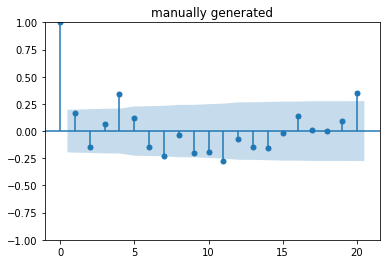

In [45]:
# 5
tsaplots.plot_acf(np.array(manual))
plt.title('manually generated')
plt.show()

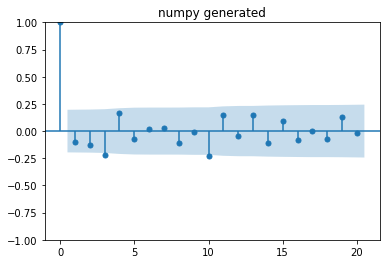

In [46]:
tsaplots.plot_acf(np.array(uniform))
plt.title('numpy generated')
plt.show()

#### Problem 2

1) This algorithm consists of the following steps:
- compute cumulative distribution function (CDF) $F_X (x_0) = \int_{-\infty}^{x_0}P(x)dx$
- find inverse of CDF $F_X^{-1}(x_0)$
- generate rundom number $u$ from $U\left(\left[0, 1\right]\right)$ 
- compute $x = F_X^{-1}(u)$

2)
$$
P(x) =\frac{\frac{e^{-\lambda x}}{1 - \frac{1}{2}e^{-\lambda x}}} {\int_{0}^{+\infty} \frac{e^{-\lambda x}}{1 - \frac{1}{2}e^{-\lambda x}} dx} = \frac{\lambda}{2\log(2)} \frac{e^{-\lambda x}}{1 - \frac{1}{2}e^{-\lambda x}}
$$
$$
F_X (x_0) = \frac{\lambda}{2\log(2)} \int_{0}^{x_0}\frac{e^{-\lambda x}}{1 - \frac{1}{2}e^{-\lambda x}}dx = \frac{\log(2 - e^{-\lambda x_0})}{\log(2)}
$$
$$
F_X^{-1}(y) = -\frac{\log(2 - 2^y)}{\lambda}
$$

In [73]:
# 3
class p(stats.rv_continuous):
    L = 1
    def _pdf(self, x):
        if x >= 0:
            return self.L / 2 / np.log(2) * np.exp(-self.L * x) / (1 - 0.5 * np.exp(-self.L * x))
        return 0

p_x = p()
rvs = p_x.rvs(size=100)

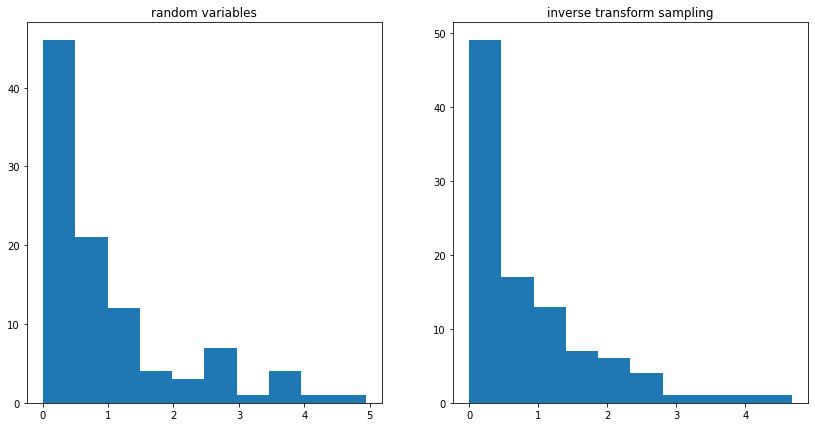

In [74]:
# 4
def inverse_transform_sampling():
    return -np.log(2 - 2**stats.uniform.rvs(size=100)) / p_x.L

fig, ax = plt.subplots(1, 2, figsize=(14,7))
ax[0].hist(rvs)
ax[0].set_title("random variables")
ax[1].hist(inverse_transform_sampling())
ax[1].set_title("inverse transform sampling");

#### Problem 3

$$
M_X(t) = \frac{1}{1 - 2t},\ t < 0.5
$$
$$
M_X(t) = \mathsf{E}[e^{tX}]
$$
$$
\mathsf{E}[100(0.5)^{x}] = 100 \mathsf{E}[(0.5)^{x}] = 100 \mathsf{E}[e^{x \log 0.5}]
$$
$$
t = \log 0.5
$$

In [3]:
100 / (1 - 2 * np.log(0.5))

41.90597841964052

#### Problem 4

$$
\begin{cases}
   x = r\cos(\theta)\\
   y = r\sin(\theta)
 \end{cases} 
 \Rightarrow 
 \det J = \begin{vmatrix}
  \cos(\theta)& -r\sin(\theta)\\
  \sin(\theta)& r\cos(\theta)
\end{vmatrix} = r \Rightarrow p(x, y) = \frac{p(r, \theta)}{r}
$$
$$
p(x,y) = \frac{1}{\pi},\ p(r, \theta) = \frac{r}{\pi}
$$
$$
p_r = \int_0^{2\pi}\frac{r}{\pi}d\theta = 2r
$$
$$
CDF_r = R^2 \Rightarrow r = CDF_{r}^{-1}(\xi_1) = \sqrt{\xi_1}
$$
$$
p(\theta | r) = \frac{1}{2\pi} \Rightarrow theta = 2\pi \xi_2
$$

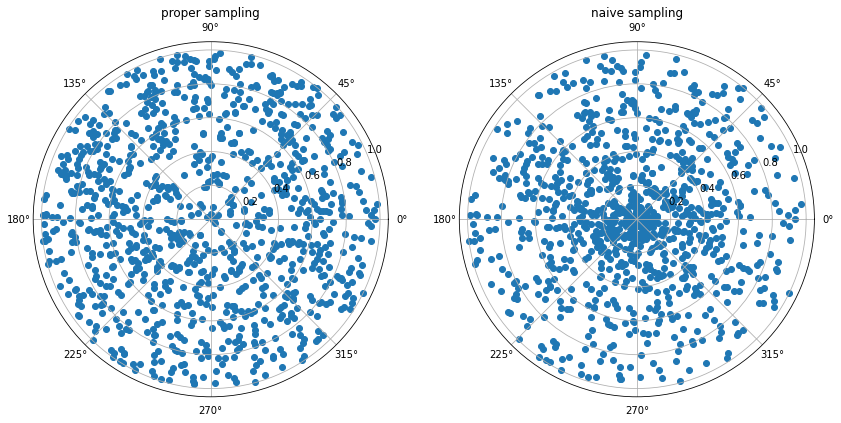

In [99]:
def proper_sampling(xi_1, xi_2):
    r = xi_1 ** 0.5
    theta = 2 * np.pi * xi_2
    return theta, r

def naive_sampling(xi_1, xi_2):
    r = xi_1.copy()
    theta = 2 * np.pi * xi_2
    return theta, r

xi_1 = stats.uniform.rvs(size=1000)
xi_2 = stats.uniform.rvs(size=1000)

fig, ax = plt.subplots(1, 2, figsize=(14,7), subplot_kw={'projection': 'polar'})
ax[0].scatter(*proper_sampling(xi_1, xi_2))
ax[0].set_title("proper sampling")
ax[1].scatter(*naive_sampling(xi_1, xi_2))
ax[1].set_title("naive sampling");

#### Problem 5

For two variables, the sampling procedure is defined as follows:
- Given correlation ratio $\rho$, build correlation matrix $R = \begin{bmatrix}1 & \rho \\ \rho & 1\end{bmatrix}$.
- Sample $N$ variables $Y_1, Y_2$ from multivariate normal distribution with zero mean and covariance matrix $R$.
- Use CDF $\Phi$ of normal distribution to map $Y_1, Y_2$ into the range $[0, 1]$ and get uniformly distributed $U_1, U_2$.

In [17]:
# 1
def sample(correlation_ratio, size=100):
    Y = stats.multivariate_normal.rvs(np.zeros(2), np.array([[1, correlation_ratio], [correlation_ratio, 1]]), size=size)
    U1 = 2 * np.pi * stats.norm.cdf(Y[:, 0])
    U2 = 2 * np.pi * stats.norm.cdf(Y[:, 1])
    return U1, U2

U1, U2 = sample(1)
print(stats.pearsonr(U1, U2))
# 2
print(stats.pearsonr(U1, -U2))

(0.9999999999999999, 0.0)
(-0.9999999999999999, 0.0)


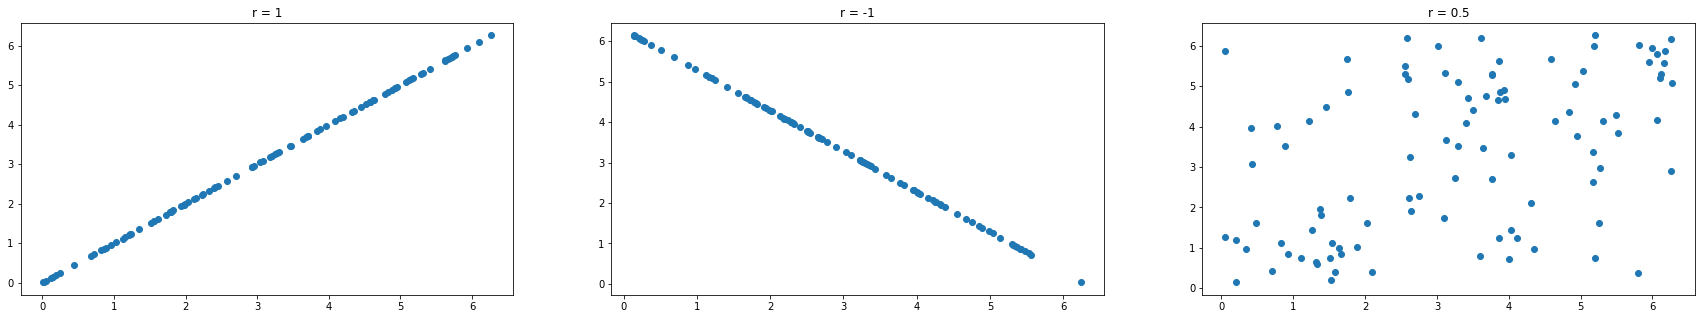

In [21]:
# 3
fig, ax = plt.subplots(1, 3, figsize=(30,5))
ax[0].scatter(*sample(1))
ax[0].set_title("r = 1")
ax[1].scatter(*sample(-1))
ax[1].set_title("r = -1")
ax[2].scatter(*sample(0.5))
ax[2].set_title("r = 0.5");